**Description** **of** **Data**:

Banks run into losses when customers don't pay their loans on time. Because of this, every year, banks have losses in crores, and this also impacts the country's economic growth to a large extent. In this Dataset , we look at various attributes such as funded amount, location, loan, balance, etc., to predict whether a person will be a loan defaulter.

To solve this problem, we  has created a training dataset of 67,463 rows and 35 columns and a testing dataset of 28,913 rows and 34 columns. The dataset demands a few pre-requisite skills like how to handle datasets, underfitting vs overfitting, and the ability to optimize “log_loss” to generalize well on unseen data.


**Description** **of** **Attributes**:

•	ID: unique ID of representative

•	Loan Amount: loan amount applied

•	Funded Amount: loan amount funded

•	Funded Amount Investor: loan amount approved by the investors

•	Term: term of loan (in months)

•	Batch Enrolled: batch numbers to representatives

•	Interest Rate: interest rate (%) on loan

•	Grade: grade by the bank

•	Sub Grade: sub-grade by the bank

•	Debit to Income: ratio of representative's total monthly debt repayment divided by self-reported monthly income excluding mortgage

•	Delinquency - two years: number of 30+ days delinquency in past 2 - years

•	Inquires - six months: total number of inquiries in last 6 months

•	Open Account: number of open credit line in representative's - credit line

•	Public Record: number of derogatory public records

•	Revolving Balance: total credit revolving balance

•	Revolving Utilities: amount of credit a representative is using - relative to revolving_balance

•	Total Accounts: total number of credit lines available in - representatives credit line

•	Initial List Status: unique listing status of the loan - - W(Waiting), F(Forwarded)

•	Total Received Interest: total interest received till date

•	Total Received Late Fee: total late fee received till date

•	Recoveries: post charge off gross recovery

•	Collection Recovery Fee: post charge off collection fee

•	Collection 12 months Medical: total collections in last 12 months - excluding medical collections

•	Application Type: indicates when the representative is an individual or joint

•	Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled

•	Accounts Delinquent: number of accounts on which the representative is delinquent

•	Total Collection Amount: total collection amount ever owed

•	Total Current Balance: total current balance from all accounts

•	Total Revolving Credit Limit: total revolving credit limit

•	Loan Status: 1 = Defaulter, 0 = Non-Defaulters


**Import** **required** **packages**

In [59]:
import pandas as pd
import numpy as np

**Read** **Train** **and** **Test** **Data**

In [60]:
df1 = pd.read_csv('/content/train.csv')
df2 = pd.read_csv('/content/test.csv')

**Understanding** **the** **Data**

In [61]:
df1.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [62]:
df2.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

In [63]:
pd.set_option('display.max_columns', 500)

In [64]:
df1.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [65]:
df2.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145


In [66]:
df1.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,105123.15580,Verified,n,Debt consolidation,16.052112,0,0,30,0,8762,81.692328,16,f,1324.255922,0.000671,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [67]:
df2.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
28908,11537800,35000,35000,35000.0,60,BAT5629144,16.24,C,C5,MORTGAGE,360000.0,Verified,n,Credit card refinancing,7.31,0,0,8,1,83274,72.2,16,f,10116.33,0.0,0.0,0.0,0,INDIVIDUAL,109,0,0,883984,114000
28909,11538258,25000,25000,25000.0,60,BAT5629144,14.98,C,C3,MORTGAGE,105000.0,Source Verified,n,Debt consolidation,10.22,0,1,10,0,26356,50.9,26,f,6493.95,0.0,0.0,0.0,0,INDIVIDUAL,104,0,0,513925,51800
28910,13147685,30000,30000,29950.0,60,BAT2136391,18.24,D,D5,MORTGAGE,74100.0,Verified,n,Debt consolidation,27.30,0,0,19,0,31303,47.7,45,f,7785.19,0.0,0.0,0.0,1,INDIVIDUAL,83,0,0,296294,65600
28911,13917689,25000,25000,24950.0,60,BAT2136391,15.61,D,D1,MORTGAGE,130000.0,Verified,n,Debt consolidation,27.29,2,0,12,0,25470,83.8,34,f,5513.52,0.0,0.0,0.0,0,INDIVIDUAL,83,0,0,428723,30400
28912,10763026,24925,24925,24925.0,60,BAT2575549,14.30,C,C1,MORTGAGE,56000.0,Verified,n,Debt consolidation,10.39,0,0,19,0,18591,29.6,47,f,6299.81,0.0,0.0,0.0,0,INDIVIDUAL,109,0,0,283758,62900


In [68]:
df1.shape, df2.shape

((67463, 35), (28913, 34))

In [69]:
df1.size, df2.size

(2361205, 983042)

In [70]:
df1.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,0.346606,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,0.000000,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [71]:
df2.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
count,2.891300e+04,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,2.891300e+04,28913.000000
mean,2.944966e+07,16404.027462,15619.911113,14741.536698,54.543078,12.187577,79983.752348,22.159266,0.332065,0.276900,13.663439,0.111092,9937.451423,53.860078,20.398540,1917.754435,0.922863,50.624944,1.393220,0.019576,65.007574,0.000968,159.747553,1.530975e+05,25013.808425
std,2.206842e+07,8358.898287,8229.977503,7230.397758,8.991800,3.911259,45231.316383,8.657629,0.818869,0.663999,6.114777,0.388741,10931.313717,22.801701,9.650339,2109.442877,4.765042,336.450176,15.139809,0.138540,42.494090,0.031105,911.671785,1.391309e+05,22284.519460
min,1.297893e+06,1000.000000,1000.000000,1000.000000,36.000000,5.320000,14907.925920,0.730000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,4.794657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.260000e+02,1000.000000
25%,8.272049e+06,9776.000000,9175.000000,9695.445501,58.000000,9.422042,50791.000000,15.622891,0.000000,0.000000,10.000000,0.000000,3177.000000,38.997949,14.000000,524.130000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,3.000000,4.397200e+04,9325.000000
50%,2.596622e+07,15600.000000,13200.000000,12930.601270,59.000000,11.688652,68894.324470,21.530000,0.000000,0.000000,12.000000,0.000000,6769.000000,54.867003,19.000000,1216.347147,0.027878,2.165909,0.579620,0.000000,60.000000,0.000000,30.000000,1.092860e+05,18848.000000
75%,4.855801e+07,21651.000000,21552.000000,19226.397540,59.000000,14.640000,94684.941810,28.840000,0.000000,0.000000,15.000000,0.000000,12803.000000,70.521791,25.000000,2474.594118,0.061107,4.610188,0.974739,0.000000,95.000000,0.000000,44.000000,2.222960e+05,33860.000000
max,7.226845e+07,35000.000000,35000.000000,35000.000000,60.000000,27.310000,406944.859000,39.629977,9.000000,5.000000,37.000000,4.000000,188657.000000,100.799622,73.000000,14313.816110,42.520996,4325.594909,743.166000,1.000000,161.000000,1.000000,27076.000000,1.183282e+06,233500.000000


In [72]:
df1.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [73]:
df2.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [74]:
df1.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


**Target** **Variable**

In [75]:
df1["Loan Status"].count()

67463

In [76]:
df1["Loan Status"].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

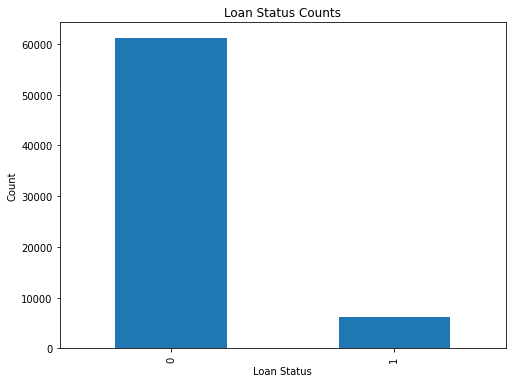

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of loan status counts
plt.figure(figsize=(8,6))
df1['Loan Status'].value_counts().plot(kind='bar')
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [78]:
df1["Term"].value_counts()

59    43780
58    22226
36     1457
Name: Term, dtype: int64

<Axes: title={'center': 'Loan Term Distribution'}, xlabel='Term', ylabel='Count'>

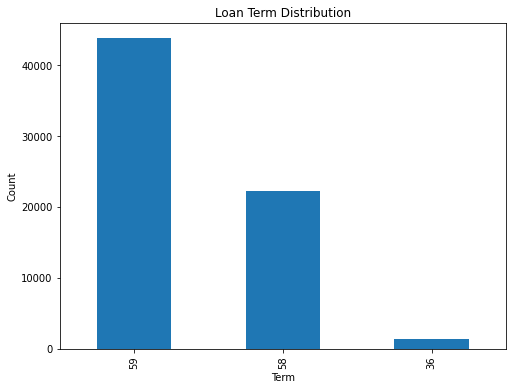

In [79]:
plt.figure(figsize=(8,6))
df1['Term'].value_counts().plot(kind='bar', title='Loan Term Distribution', xlabel='Term', ylabel='Count')

In [80]:
df1["Verification Status"].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

<Axes: title={'center': 'Verification Status'}, ylabel='Count'>

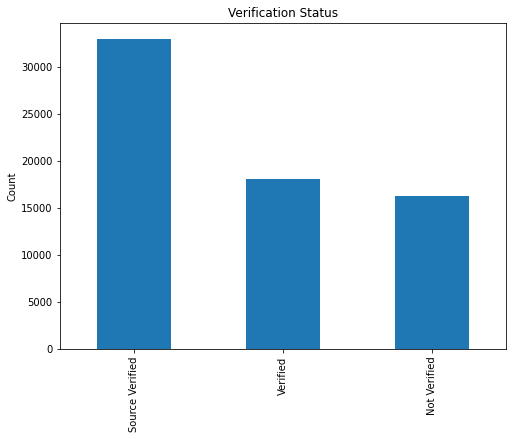

In [81]:
plt.figure(figsize=(8,6))
df1['Verification Status'].value_counts().plot(kind='bar', title='Verification Status', ylabel='Count')

In [82]:
df1["Delinquency - two years"].value_counts()

0    52054
1    11736
2     2651
3      445
7      252
6      191
5       74
8       44
4       16
Name: Delinquency - two years, dtype: int64

<Axes: title={'center': 'Delinquency - two years'}, ylabel='Count'>

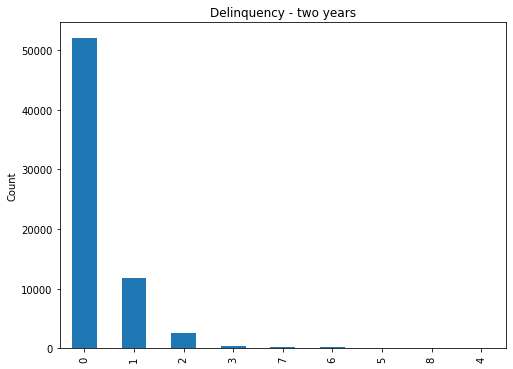

In [83]:
plt.figure(figsize=(8,6))
df1['Delinquency - two years'].value_counts().plot(kind='bar', title='Delinquency - two years', ylabel='Count')

In [84]:
df1["Sub Grade"].value_counts()

B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64

<Axes: title={'center': 'Loan Sub Grade'}, ylabel='Count'>

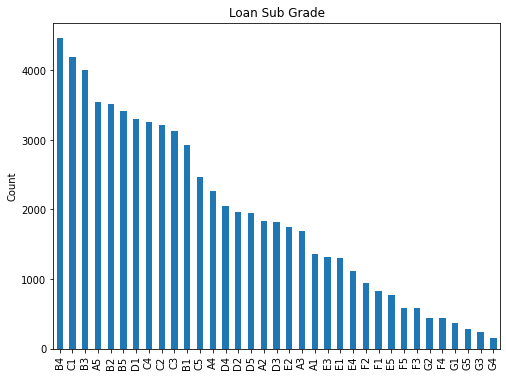

In [85]:
plt.figure(figsize=(8,6))
df1['Sub Grade'].value_counts().plot(kind='bar', title='Loan Sub Grade', ylabel='Count')

In [86]:
df1["Grade"].value_counts()

C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G      630
Name: Grade, dtype: int64

<Axes: title={'center': 'Loan Grade'}, ylabel='Count'>

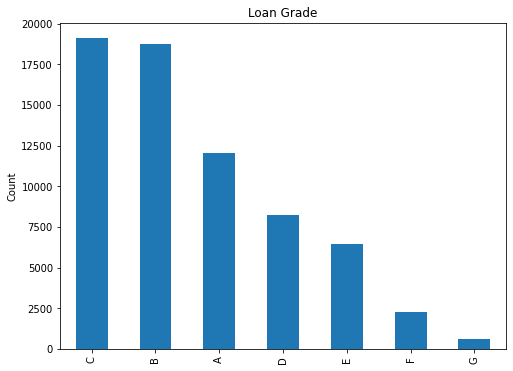

In [87]:
plt.figure(figsize=(8,6))
df1['Grade'].value_counts().plot(kind='bar', title='Loan Grade', ylabel='Count')

In [88]:
df1["Employment Duration"].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

<Axes: title={'center': 'Employment Duration'}, ylabel='Count'>

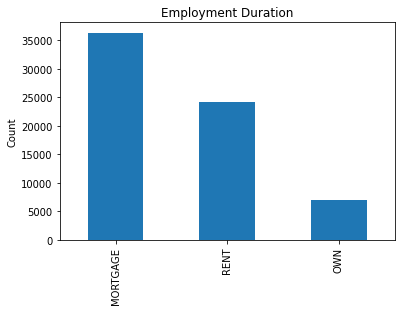

In [89]:
df1['Employment Duration'].value_counts().plot(kind='bar', title='Employment Duration', ylabel='Count')

In [90]:
df1["Initial List Status"].value_counts()

w    36299
f    31164
Name: Initial List Status, dtype: int64

<Axes: title={'center': 'Initial List Status'}, ylabel='Count'>

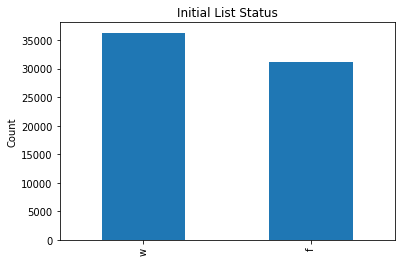

In [91]:
df1['Initial List Status'].value_counts().plot(kind='bar', title='Initial List Status', ylabel='Count')

In [92]:
df1["Application Type"].value_counts()

INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64

<Axes: title={'center': 'Application Type'}, ylabel='Count'>

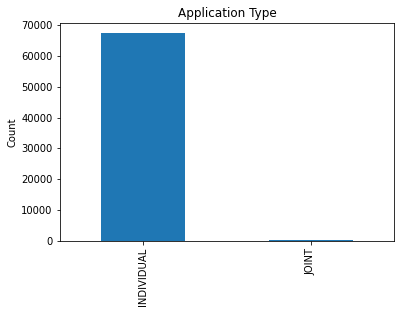

In [93]:
df1['Application Type'].value_counts().plot(kind='bar', title='Application Type', ylabel='Count')

<Axes: xlabel='Grade', ylabel='count'>

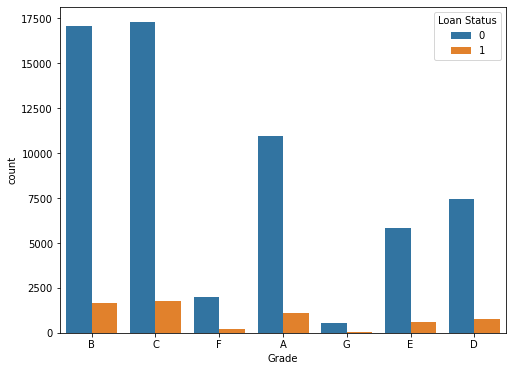

In [94]:
# plot a bar plot of Loan Status by Grade
plt.figure(figsize=(8,6))
sns.countplot(x='Grade', hue='Loan Status', data=df1)

<Axes: xlabel='Sub Grade', ylabel='count'>

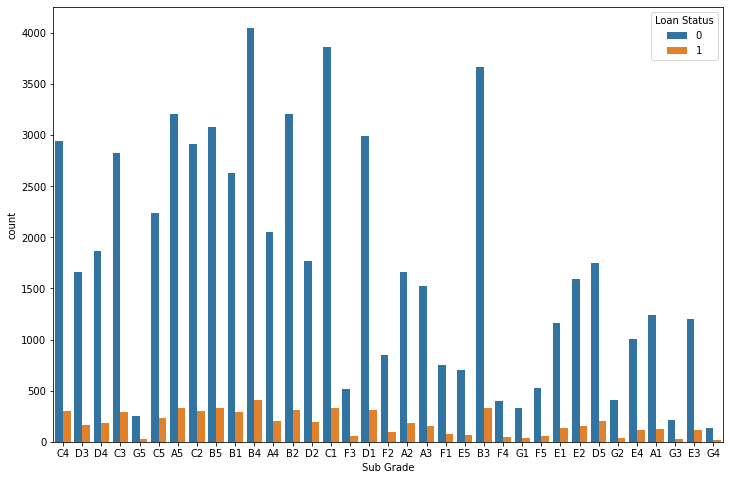

In [95]:
# plot a bar plot of Loan Status by Sub Grade
plt.figure(figsize=(12,8))
sns.countplot(x='Sub Grade', hue='Loan Status', data=df1)

<Axes: xlabel='Initial List Status', ylabel='count'>

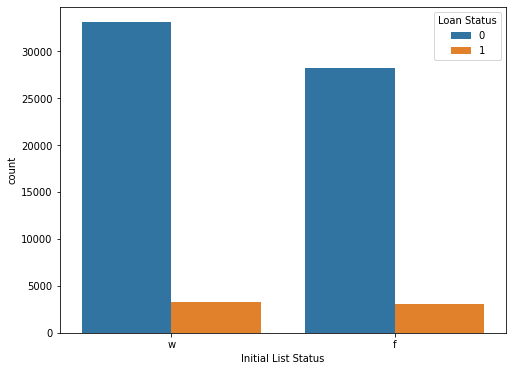

In [96]:
# plot a bar plot of Loan Status by Intial List Status
plt.figure(figsize=(8,6))
sns.countplot(x='Initial List Status', hue='Loan Status', data=df1)

<Axes: xlabel='Application Type', ylabel='count'>

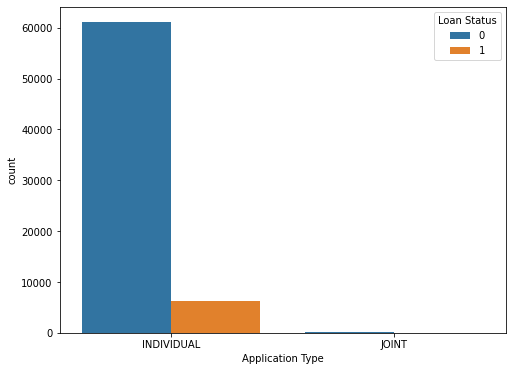

In [97]:
# plot a bar plot of Loan Status by Applicant Type
plt.figure(figsize=(8,6))
sns.countplot(x='Application Type', hue='Loan Status', data=df1)

<Axes: xlabel='Verification Status', ylabel='count'>

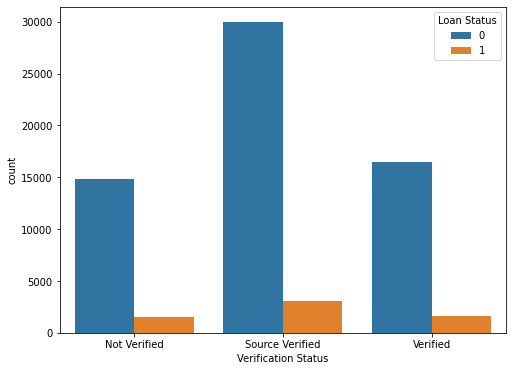

In [98]:
# plot a bar plot of Loan Status by Verification Status
plt.figure(figsize=(8,6))
sns.countplot(x='Verification Status', hue='Loan Status', data=df1)

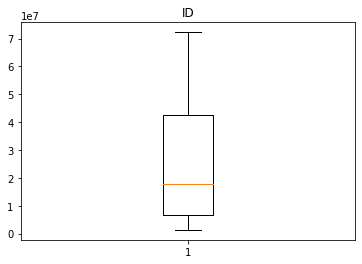

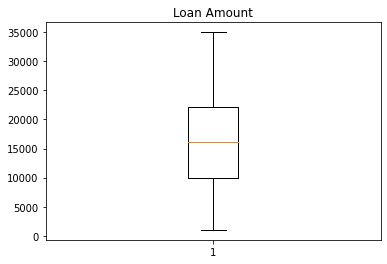

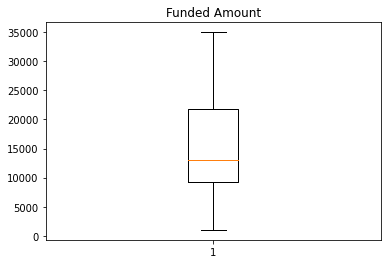

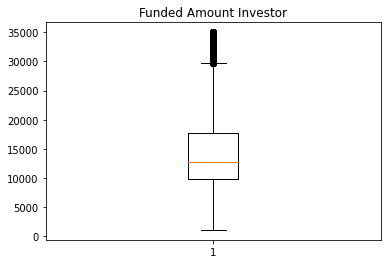

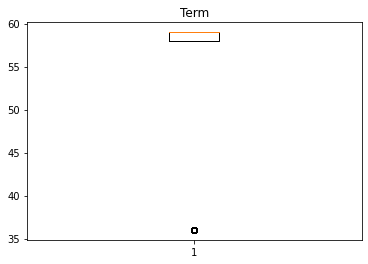

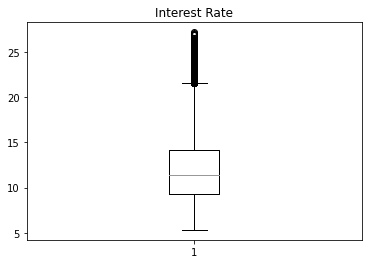

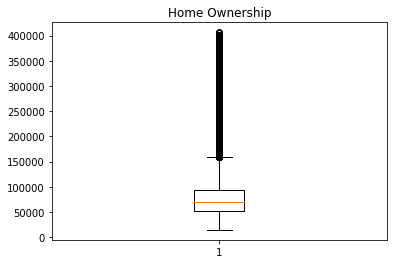

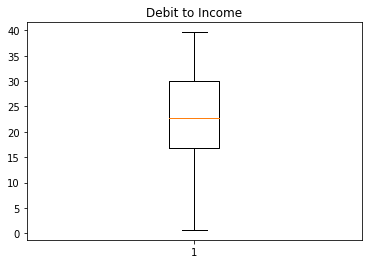

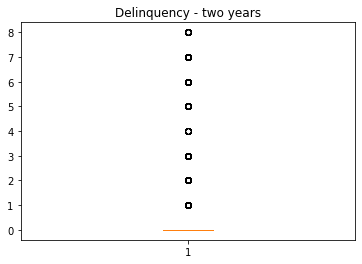

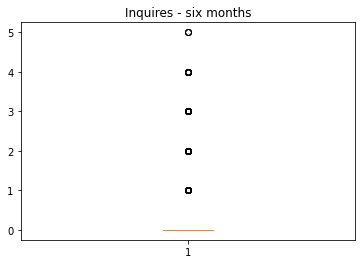

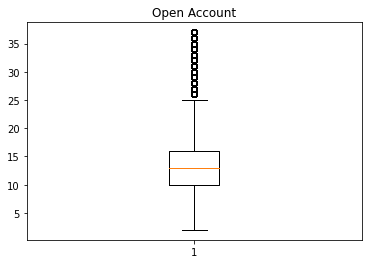

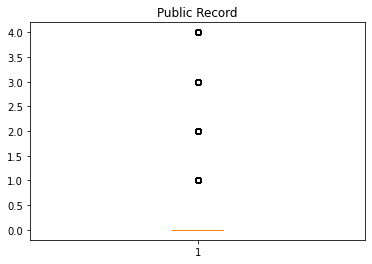

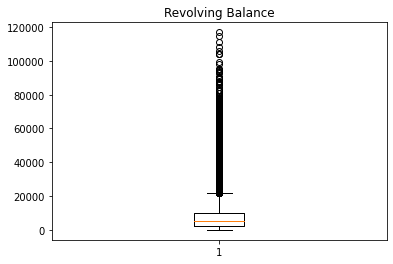

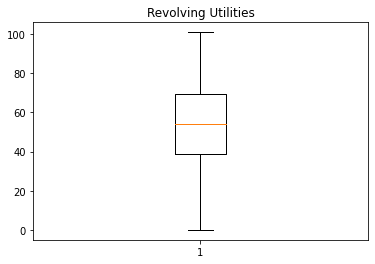

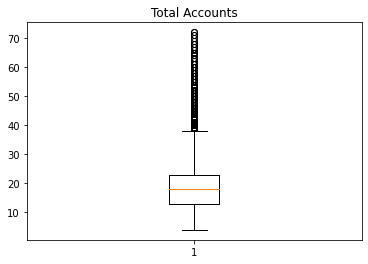

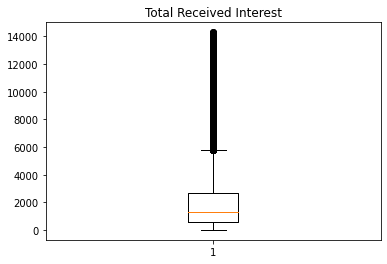

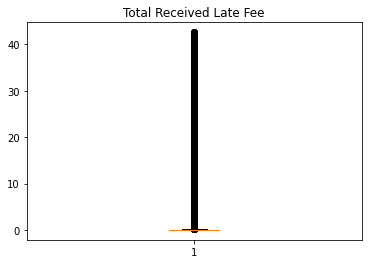

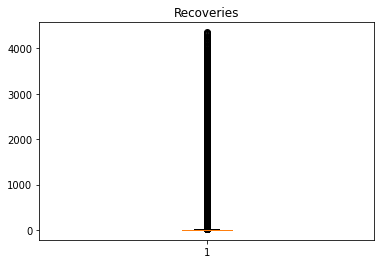

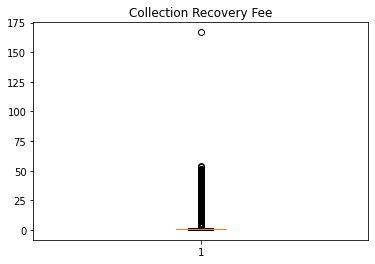

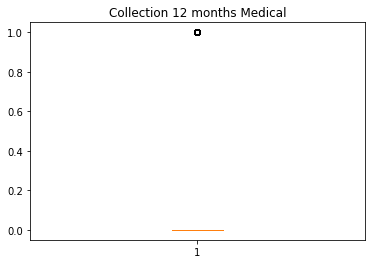

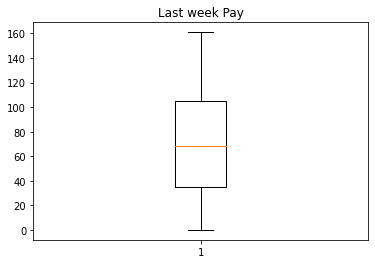

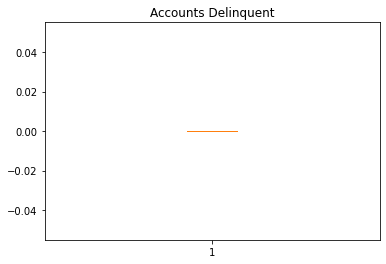

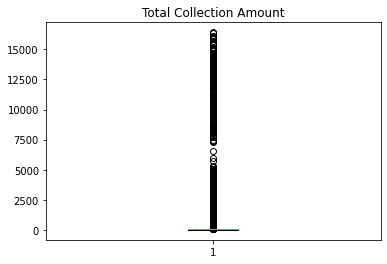

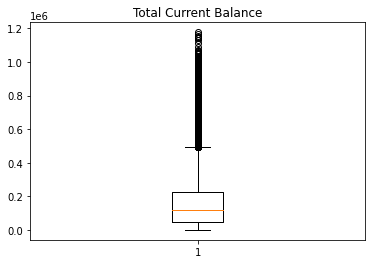

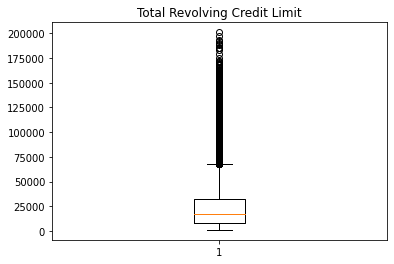

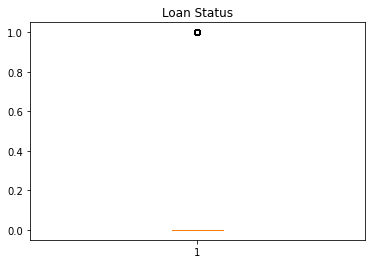

In [99]:
num_cols = ['ID','Loan Amount','Funded Amount','Funded Amount Investor','Term','Interest Rate','Home Ownership','Debit to Income','Delinquency - two years','Inquires - six months','Open Account','Public Record','Revolving Balance','Revolving Utilities','Total Accounts','Total Received Interest','Total Received Late Fee','Recoveries','Collection Recovery Fee','Collection 12 months Medical','Last week Pay','Accounts Delinquent','Total Collection Amount','Total Current Balance','Total Revolving Credit Limit','Loan Status']
for i in num_cols:
  plt.boxplot(df1[i])
  plt.title(i)
  plt.show()

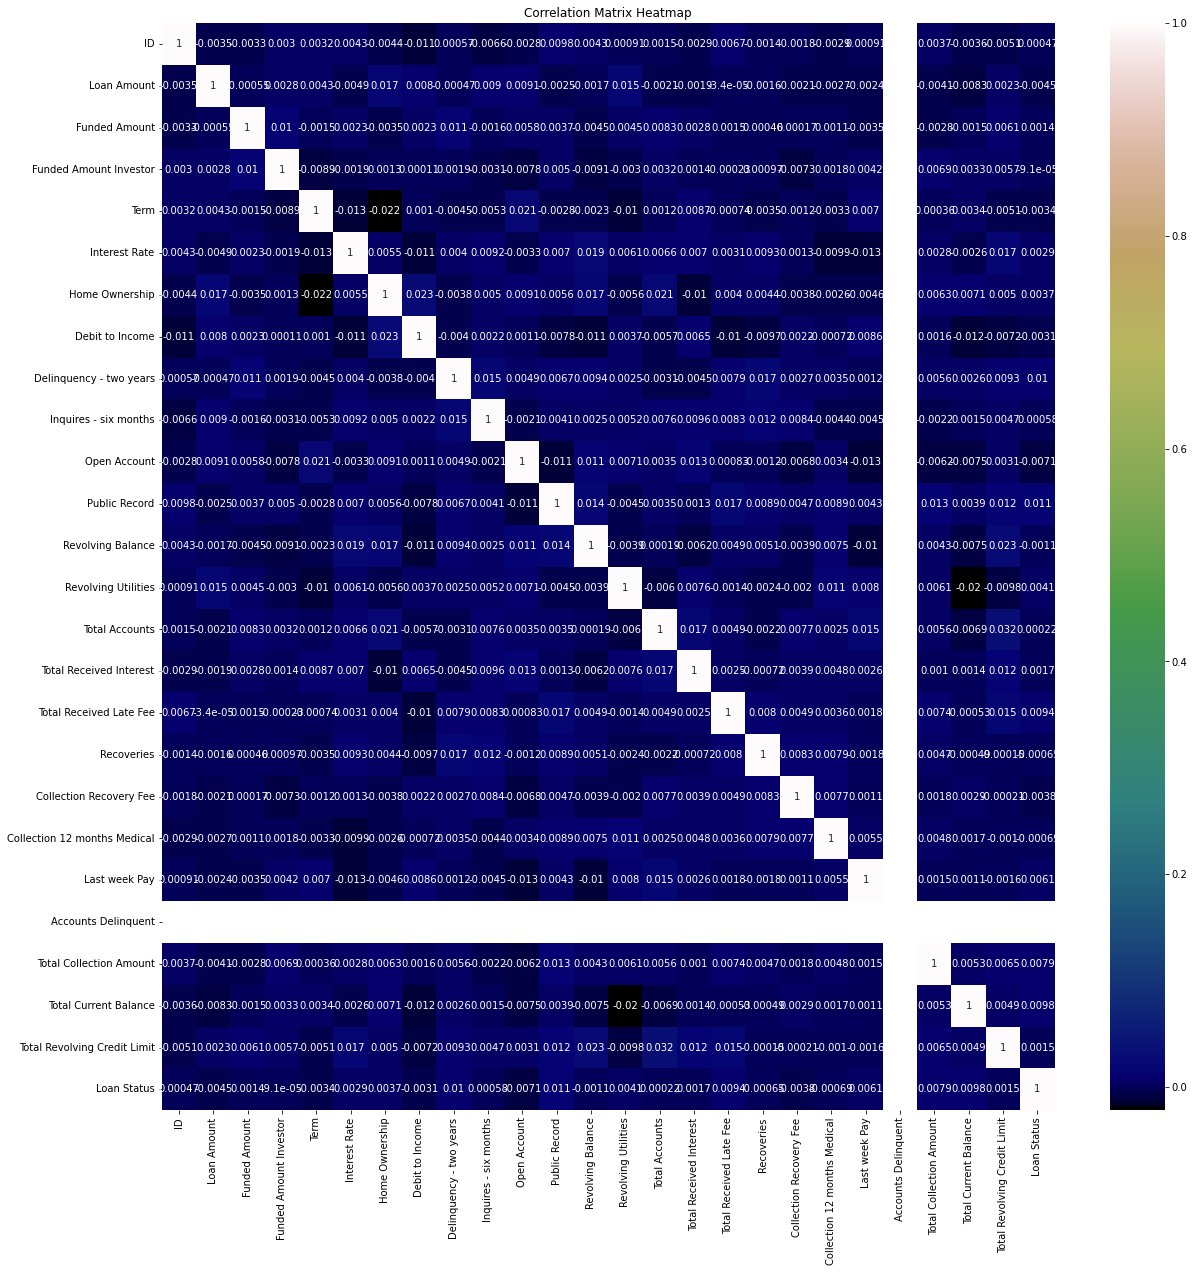

In [100]:
# Correlation matrix heatmap
corr_matrix = df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='gist_earth')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Understanding** **the** **datatype** **of** **each** **feature**

In [101]:
df1.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [102]:
categorical_list=('Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type')

In [103]:
for i in categorical_list:
  df1[i]=df1[i].astype('category').cat.codes

In [104]:
df1.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                     int8
Interest Rate                   float64
Grade                              int8
Sub Grade                          int8
Employment Duration                int8
Home Ownership                  float64
Verification Status                int8
Payment Plan                       int8
Loan Title                         int8
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status                int8
Total Received Interest         float64
Total Received Late Fee         float64


In [105]:
for i in categorical_list:
  df2[i]=df2[i].astype('category').cat.codes

In [106]:
df2.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                     int8
Interest Rate                   float64
Grade                              int8
Sub Grade                          int8
Employment Duration                int8
Home Ownership                  float64
Verification Status                int8
Payment Plan                       int8
Loan Title                         int8
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status                int8
Total Received Interest         float64
Total Received Late Fee         float64


In [107]:
df1["Accounts Delinquent"].value_counts()

0    67463
Name: Accounts Delinquent, dtype: int64

In [108]:
df1 = df1.drop(['Accounts Delinquent'],axis=1)

In [109]:
df1["Payment Plan"].value_counts()

0    67463
Name: Payment Plan, dtype: int64

In [110]:
df1 = df1.drop(['Payment Plan'],axis=1)

In [111]:
df1 = df1.drop(['ID'],axis=1)

In [112]:
df1.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,16,11.135007,1,13,0,176346.62670,0,42,16.284758,1,0,13,0,24246,74.932551,7,1,2929.646315,0.102055,2.498291,0.793724,0,0,49,31,311301,6619,0
1,3609,11940,12191.99692,59,4,12.237563,2,17,2,39833.92100,1,49,15.412409,0,0,12,0,812,78.297186,13,0,772.769385,0.036181,2.377215,0.974821,0,0,109,53,182610,20885,0
2,28276,9311,21603.22455,59,11,12.545884,5,18,0,91506.69105,1,42,28.137619,0,0,14,0,1843,2.073040,20,1,863.324396,18.778660,4.316277,1.020075,0,0,66,34,89801,26155,0
3,11170,6954,17877.15585,59,15,16.731201,2,12,0,108286.57590,1,49,18.043730,1,0,7,0,13819,67.467951,12,1,288.173196,0.044131,0.107020,0.749971,0,0,39,40,9189,60214,0
4,16890,13226,13539.92667,59,32,15.008300,2,18,0,44234.82545,1,38,17.209886,1,3,13,1,1544,85.250761,22,1,129.239553,19.306646,1294.818751,0.368953,0,0,18,430,126029,22579,0
